# Strong nuclear force

*from the AQA A-level physics specification (September 2015 onwards)*
> The strong nuclear force; its role in keeping the nucleus stable; short-range
> attraction up to approximately 3 fm, very-short range repulsion closer than
> approximately 0.5 fm.

The work on creating this graph was originally motivated by the [force graph](https://upload.wikimedia.org/wikipedia/commons/5/53/ReidForce2.jpg) for the Reid potential, plotted by [Bdushaw](https://commons.wikimedia.org/w/index.php?title=User:Bdushaw&action=edit&redlink=1)

The nuclear force as computed according to equations by Reid, R.V. (1968). "Local phenomenological nucleon-nucleon potentials". *Annals of Physics* 50: 411&ndash;448

From that paper, the force graph from wikipedia is obtained from equation (16), the soft core $T = 1$ potential in MeV: 

$$ V(^1S)= -h\frac{e^{-x}}{x} - 1650.6 \frac{e^{-4x}}{x} +6484.2 \frac{e^{-7x}}{x}, $$

where $h = 10.463$ MeV and $x = \mu r$ with $\mu = .7$ F$^{-1}$.  

The force is then calculated from $F=-\frac{\mathrm{d}V}{\mathrm{d}r}$ 

\begin{align}
F=-\frac{\mathrm{d}V}{\mathrm{d}r}=-\frac{\mathrm{d}V}{\mathrm{d}x} \frac{\mathrm{d}x}{\mathrm{d}r} &= - \mu \frac{\mathrm{d}}{\mathrm{d}x} \left(\frac{1}{x}\right)\left(-he^{-x} - 1650.6 e^{-4x} +6484.2 e^{-7x}\right)\\
 & = \frac{\mu}{x^2}\left(-he^{-x} - 1650.6 e^{-4x} +6484.2 e^{-7x}\right)\\
 & \quad - \frac{\mu}{x}\left(he^{-x} + 4 \times 1650.6 e^{-4x} - 7 \times 6484.2 e^{-7x}\right)\\
\end{align}

then we convert from MeV / fm to Newton:

$$
\frac{\mathrm{MeV}}{\mathrm{fm}}\times\frac{1.6\times10^{-13}~\mathrm{J}}{1~\mathrm{MeV}}\times\frac{10^{15}~\mathrm{fm}}{1~\mathrm{m}}=160~\mathrm{J~m^{-1}}=160~\mathrm{N}.
$$

To express the empirical nature of the Reid potential, the figure is given a sketched look (the [XKCD functionality](http://jakevdp.github.io/blog/2013/07/10/XKCD-plots-in-matplotlib/) now built into matplotlib - all credit to Jake Vanderplas of [Pythonic Perambulations](http://jakevdp.github.com/blog/2012/10/07/xkcd-style-plots-in-matplotlib/) who designed the [XKCDify](http://jakevdp.github.io/blog/2012/10/07/xkcd-style-plots-in-matplotlib/) hack) and a cartoonish font that enhances the overall effect. Using a sketch style conveys to the viewer that the potential is approximate, and that it is the higher-level concepts rather than low-level details that are important. 


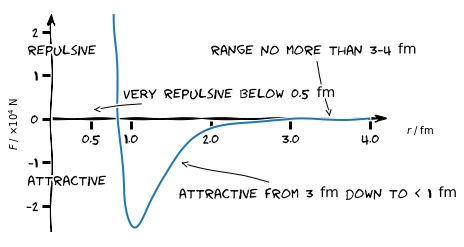

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 10.463 #definition from paper
mu=0.7 # definition from paper
r=np.arange(0.01,4,0.01) # numbers
x=mu*r # definition from paper

#V = - (h/x) * (np.exp(-x) + 39.633 * (-3 * x) )

F = ( mu / x**2 ) * ( -h * np.exp (-x) - 1650.6 * np.exp (-4 * x) \
 + 6484.2 * np.exp (-7 * x) ) \
- ( mu / x ) * (  h * np.exp (-x) + 1650.6 * 4 * np.exp (-4 * x) \
 - 6484.2 * 7 * np.exp (-7 * x) )

F=160*F/10000 # convert from MeV / fm to Newton, and divide by 10^4 for axes

E= (9e9 * (1.6e-19)**2) / (10000*(r*1e-15)**2)

def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
#    plt.xticks([]) # labels 
#    plt.yticks([])
    ax.xaxis.set_ticks_position('bottom') # tick markers
    plt.tick_params(axis='x', direction='out', pad=float(5))
#    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./30.*(ymax-ymin) 
    hl = 1./30.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

fig=plt.figure()

ax = fig.add_subplot(1,1,1)
with plt.xkcd():
    plt.xticks([0.5,1.0,2.0,3.0,4.0])
    #plt.rc('text', usetex=True)
    plt.plot(r, F)
    #plt.plot(r, E)
    plt.ylabel('$F$ $/$ $\\times 10^{4}$ $\mathrm{N}$')
    #plt.title('variation of strong nuclear force \n with separation of proton and neutron')
    plt.xlabel('$r$ $/$ $\mathrm{fm}$')
    ax.xaxis.set_label_coords(1.1,0.5)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',-0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',-0.02))
    ax.text(-0.3, 1.5, 'repulsive')
    ax.text(-0.3, -1.5, 'attractive')
    plt.annotate( 'range no more than 3-4 $\mathrm{fm}$',
    xy=(3.5,0), arrowprops=dict(arrowstyle='->'), xytext=(2,1.5) )
    plt.annotate( 'attractive from 3 $\mathrm{fm}$ down to < 1 $\mathrm{fm}$',
    xy=(1.6,-1), arrowprops=dict(arrowstyle='->'), xytext=(1.6,-1.8) )
    plt.annotate( 'VERY repulsive below 0.5 $\mathrm{fm}$',
    xy=(0.5,0.2), arrowprops=dict(arrowstyle='->'), xytext=(0.9,0.5) )
    plt.xlim((0,4.2))
    plt.ylim((-2.6,2.4))

    arrowed_spines(fig, ax)

    plt.savefig("strongnuclear.png", bbox_inches='tight', pad_inches=0.1)

    plt.show()